In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
phone=pd.read_excel("mobilephoneprice.xlsx")

phone_data=phone.iloc[::3]
phone_data.reset_index(drop=True,inplace=True)

satir_sayisi=phone_data.shape[0]
sutun_sayisi=phone_data.shape[1]

In [3]:
def numeric_to_categoric(dataframe, column_name):
    """
        0 ve 1 seklinde gorulen verileri 
        0 icin yok, 1 icin var olarak degistirir
    Args:
        dataframe (data.Frame): degistirelecek dataframe
        column_name ([type]): degistirelecek dataframe'in kolonu

    Raises:
        Exception: 
        eger 0 ve 1 sekilde 2 den fazla degisken varsa
        exception doner
    Returns:
        dataframe
    """
    if dataframe[column_name].nunique() != 2:
        raise Exception("Ikiden fazla degişken görüldü")
    else:
        dataframe.loc[dataframe[column_name] == 1, column_name] = "var"
        dataframe.loc[dataframe[column_name] == 0, column_name] = "yok"
    
    return dataframe

In [4]:
kategorik_veriler = ["blue", "dual_sim", "four_g", "touch_screen", "wifi"]

In [5]:
sayisal_veriler = ["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores",
                   "pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]

In [6]:
pd.options.mode.chained_assignment = None

In [7]:
for i in phone_data[kategorik_veriler].columns:
    numeric_to_categoric(phone_data,phone_data[i].name)

In [31]:
phone_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
0,842,yok,2.2,yok,1.0,yok,7,0.6,188,2,2,20.0,756,2549,9,7.0,19,yok,var,1
1,615,var,2.5,yok,0.0,yok,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,yok,yok,2
2,1821,yok,1.7,yok,4.0,var,10,0.8,139,8,10,381.0,1018,3220,13,8.0,18,yok,var,3
3,509,var,0.6,var,2.0,var,9,0.1,93,5,15,1137.0,1224,513,19,10.0,12,yok,yok,0
4,1815,yok,2.8,yok,2.0,yok,33,0.6,159,4,17,607.0,748,1482,18,0.0,2,yok,yok,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,1139,var,0.9,var,6.0,var,58,0.5,161,2,11,742.0,999,1850,9,4.0,8,yok,yok,1
663,586,yok,2.8,yok,2.0,yok,15,0.2,83,3,11,241.0,854,2592,12,8.0,3,yok,yok,1
664,674,var,2.9,var,1.0,yok,21,0.2,198,3,4,576.0,1809,1180,6,3.0,4,var,var,0
665,794,var,0.5,var,0.0,var,2,0.8,106,6,14,1222.0,1890,668,13,4.0,19,var,yok,0


In [ ]:
pd.DataFrame([phone_data[sayisal_veriler].describe().T.loc[:, "mean"], phone_data[sayisal_veriler].describe().T.loc[:, "std"]]).T

In [33]:
def data_none(data_frame,column_name):
    ort=(data_frame[column_name].mean())
    std=(data_frame[column_name].std())
    mindeger=ort-(2*std)
    maxdeger=ort+(2*std)
        
    print(f"{column_name} ortalama      : {ort}")
    print(f"{column_name} standart sapma: {std}")
    print(f"{column_name} minimum değer : {mindeger}")
    print(f"{column_name} maximum değer : {maxdeger}")
    print(f"{mindeger} altında ve {maxdeger} üstünde kalan bütün değerler")
    print(f"none olarak atanıp ortalama değere eşitlendi.")
    print("----------------------------------------------")
    
    for i in range(len(data_frame[column_name])):
        if data_frame[column_name][i]>maxdeger or data_frame[column_name][i]<mindeger:
            data_frame[column_name][i]=np.nan
            data_frame[column_name][i]=ort

In [35]:
for i in phone_data[sayisal_veriler].columns:
    data_none(phone_data,phone_data[i].name)
#data_none(phone_data,"ram")

battery_power ortalama      : 1250.9295352323838
battery_power standart sapma: 446.51230976873273
battery_power minimum değer : 357.9049156949184
battery_power maximum değer : 2143.954154769849
357.9049156949184 altında ve 2143.954154769849 üstünde kalan bütün değerler
none olarak atanıp ortalama değere eşitlendi.
----------------------------------------------
clock_speed ortalama      : 1.5190404797601198
clock_speed standart sapma: 0.8218197287283263
clock_speed minimum değer : -0.12459897769653283
clock_speed maximum değer : 3.1626799372167724
-0.12459897769653283 altında ve 3.1626799372167724 üstünde kalan bütün değerler
none olarak atanıp ortalama değere eşitlendi.
----------------------------------------------
int_memory ortalama      : 31.454272863568217
int_memory standart sapma: 17.91150063055428
int_memory minimum değer : -4.368728397540341
int_memory maximum değer : 67.27727412467678
-4.368728397540341 altında ve 67.27727412467678 üstünde kalan bütün değerler
none olarak ata

In [ ]:
phone_data

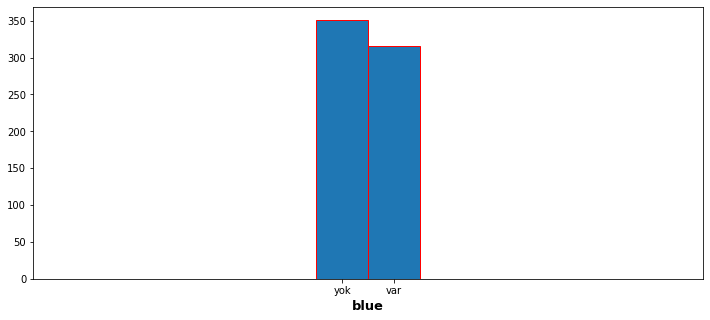

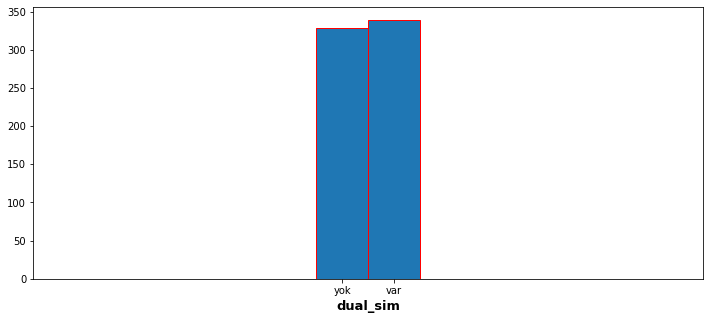

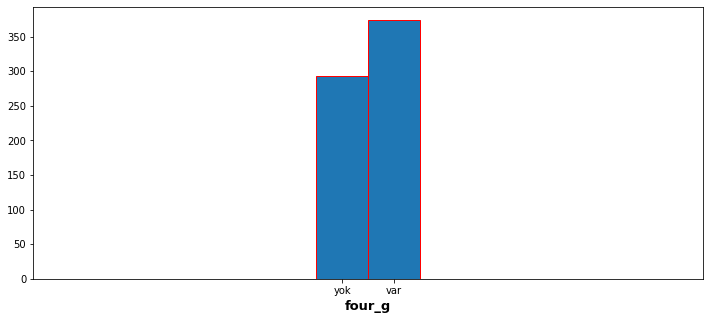

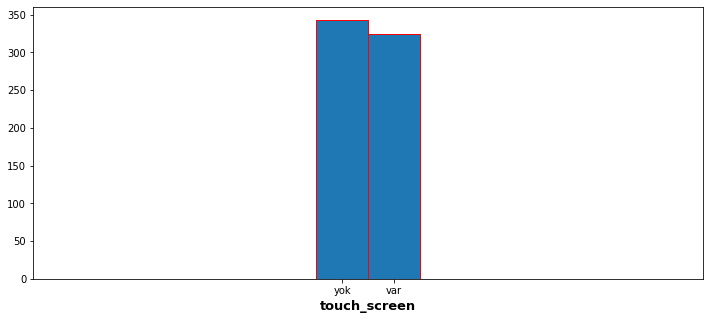

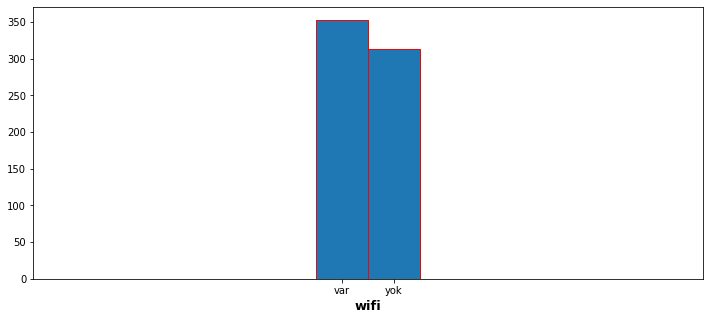

In [10]:
for i in phone_data[kategorik_veriler].columns:
    bins = np.arange(10) - 0.5
    plt.figure(figsize = (12,5))
    plt.hist(x = phone_data[i].astype("str"), bins = bins, edgecolor = "red")
    plt.xlabel(phone_data[i].name, weight='bold', fontsize = 13)
    plt.xlim([-6, 7])

In [11]:
ent = []
def entropy_cal(dataframe,column_name):
    x=dataframe[column_name].value_counts()[0]
    y=dataframe[column_name].value_counts()[1]
    z=dataframe[column_name].value_counts().sum()
    ent.append(entropy([x/z,y/z],base=2))
    return entropy    

In [12]:
for i in phone_data[kategorik_veriler].columns:
    entropy_cal(phone_data,phone_data[i].name)
    print(f"{phone_data[i].name} entropi: {ent}") 
    ent = []

blue entropi: [0.9980128601038274]
dual_sim entropi: [0.9998038004830077]
four_g entropi: [0.9893356253319693]
touch_screen entropi: [0.9994145917664545]
wifi entropi: [0.9975324280710957]


In [36]:
x = phone_data.loc[:,sayisal_veriler].values
x

array([[8.420e+02, 2.200e+00, 7.000e+00, ..., 9.000e+00, 7.000e+00,
        1.900e+01],
       [6.150e+02, 2.500e+00, 1.000e+01, ..., 1.600e+01, 8.000e+00,
        1.100e+01],
       [1.821e+03, 1.700e+00, 1.000e+01, ..., 1.300e+01, 8.000e+00,
        1.800e+01],
       ...,
       [6.740e+02, 2.900e+00, 2.100e+01, ..., 6.000e+00, 3.000e+00,
        4.000e+00],
       [7.940e+02, 5.000e-01, 2.000e+00, ..., 1.300e+01, 4.000e+00,
        1.900e+01],
       [1.512e+03, 9.000e-01, 4.600e+01, ..., 1.800e+01, 1.000e+01,
        1.900e+01]])

# Madde 6

In [37]:
sayisal_veriler = ["battery_power","clock_speed","int_memory","m_dep","mobile_wt","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]
new_data_for_PCA = phone_data[sayisal_veriler]
new_data_for_PCA

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,7,0.6,188,2,20.0,756,2549,9,7.0,19
1,615,2.5,10,0.8,131,9,1216.0,1786,2769,16,8.0,11
2,1821,1.7,10,0.8,139,10,381.0,1018,3220,13,8.0,18
3,509,0.6,9,0.1,93,15,1137.0,1224,513,19,10.0,12
4,1815,2.8,33,0.6,159,17,607.0,748,1482,18,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
662,1139,0.9,58,0.5,161,11,742.0,999,1850,9,4.0,8
663,586,2.8,15,0.2,83,11,241.0,854,2592,12,8.0,3
664,674,2.9,21,0.2,198,4,576.0,1809,1180,6,3.0,4
665,794,0.5,2,0.8,106,14,1222.0,1890,668,13,4.0,19


In [14]:
# Normalization

after_Normalization = StandardScaler().fit_transform(new_data_for_PCA.values)
after_Normalization

array([[-0.91651768,  0.82922146, -1.36630791, ..., -0.7990831 ,
         0.3820843 ,  1.4905324 ],
       [-1.42528384,  1.19453898, -1.19869206, ...,  0.85176602,
         0.6382812 , -0.00899265],
       [ 1.2776765 ,  0.22035894, -1.19869206, ...,  0.14425925,
         0.6382812 ,  1.30309176],
       ...,
       [-1.29304946,  1.681629  , -0.58410061, ..., -1.50658987,
        -0.64270328, -1.32107707],
       [-1.02409819, -1.24091112, -1.64566766, ...,  0.14425925,
        -0.38650639,  1.4905324 ],
       [ 0.58512696, -0.7538211 ,  0.81269814, ...,  1.32343719,
         1.150675  ,  1.4905324 ]])

In [15]:
# PCA uygulama 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(after_Normalization)
principal_phone_data = pd.DataFrame(data = principalComponents,
              columns = ['principal component 1', 'principal component 2'])
principal_phone_data

,principal component 1,principal component 2
0,-1.454651,-0.945031
1,2.033747,0.826377
2,-0.573913,-0.144631
3,2.613920,-0.771893
4,-0.805645,-0.524696
...,...,...
662,-0.628849,0.092975
663,-0.138965,-2.275166
664,-0.515448,0.886784
665,1.417364,2.102679


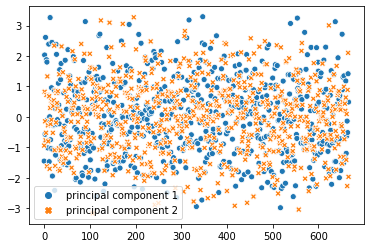

In [16]:
sns.scatterplot(data=principal_phone_data)

In [18]:
x = principal_phone_data.iloc[:, [0,1]].values
y = phone_data.iloc[:, -1].values

In [171]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [172]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [182]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [183]:
y_pred = classifier.predict(X_test)

In [185]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

0.6435643564356436

In [ ]:
cm

In [ ]:
phone_data["dual_sim"].value_counts().sum()

In [ ]:
phone_data["dual_sim"].value_counts()

In [ ]:
entropy([339 / 667, 328 / 667], base = 2)

In [ ]:
ent

In [ ]:
phone_data["blue"].row()

In [ ]:
phone_data["blue"].value_counts()

In [ ]:
phone_data["ram"].value_counts().sort_values(ascending=False)

In [ ]:
phone_data["px_height"]

In [ ]:
phone_data["px_height"].values

In [ ]:
phone_data["px_height"].value_counts().sort_values(ascending=False)

In [ ]:
phone_data.isna().sum()

In [ ]:
phone_data

In [ ]:
deger_kucultme=["battery_power","px_height","px_width","ram"]

In [ ]:
t=((phone_data["clock_speed"]*10).astype("int64"))
phone_data["clock_speed"] = t

a=((phone_data["m_dep"]*100).astype("int64"))
phone_data["m_dep"] = a

In [ ]:
med=int(phone_data.shape[0]/2)

In [ ]:
for i in phone_data[sayisal_veriler].columns:
    stdfark=int(phone_data[i].std())
    phone_data.loc[[med+stdfark],i]=np.nan
    phone_data.loc[[med-stdfark],i]=np.nan
    ort=int(phone_data[i].mean(axis=0))
    phone_data.loc[[med+stdfark],i]=ort
    phone_data.loc[[med-stdfark],i]=ort

In [ ]:
phone_data.loc[:328:]

In [ ]:
for i in phone_data[kategorik_veriler].columns:
    bins = np.arange(10) - 0.5
    plt.figure(figsize = (12,5))
    plt.hist(x = phone_data[i].astype("str"), bins = bins, edgecolor = "red")
    plt.xlabel(phone_data[i].name, weight='bold', fontsize = 13)
    plt.xlim([-1, 8])

In [ ]:
x = phone_data.loc[:,sayisal_veriler].values

In [ ]:
phone_data

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

In [ ]:
sns.scatterplot(data=principalDf)

In [ ]:
phone_data.info()

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
phone_data

In [ ]:
phone_copy.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
phone_copy_scaled = min_max_scaler.fit_transform(phone_copy[['battery_power','ram']])
df = pd.DataFrame(phone_copy_scaled)

In [ ]:
phone_copy=pd.DataFrame(phone_copy_scaled)

In [ ]:
numeric_veriler = [x for x in phone_data.columns if (phone_data[x].dtypes == "int64") | 
                                                 (phone_data[x].dtypes == "float64")]
for i in phone_data[numeric_veriler].columns:
     print(phone_data[i].value_counts(), "\n\n")

In [ ]:
a = phone_data[phone_data["wifi"] == 0]['wifi']

In [ ]:
pd.to_numeric(a)

In [ ]:
type(phone_data[phone_data["wifi"] == 0]['wifi'])

In [ ]:
phone_data.loc[:,phone_data[phone_data["wifi"] == 0]] =  "yok"
# phone_data[phone_data["wifi"] == 0] = "yok"

In [ ]:
phone_data["wifi"].astype("str")

In [ ]:
phone_data["touch_screen"].value_counts()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(x = phone_data["wifi"].astype("str"))

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [ ]:
grab_col_names(phone_data)

In [ ]:
phone_data.iloc[:333:]

In [ ]:
plt.hist(x = phone_data['dual_sim'].astype("str"))

In [ ]:
plt.hist(x = phone_data['blue'].astype("str"))

In [ ]:
kategorik_veriler = ["blue", "dual_sim", "four_g", "touch_screen", "wifi"]

for i in phone_data[kategorik_veriler].columns:
    bins = np.arange(10) - 0.5
    plt.figure(figsize = (12,5))
    plt.hist(x = phone_data[i].astype("str"), bins = bins, edgecolor = "red")
    plt.xlabel(phone_data[i].name, weight='bold', fontsize = 13)
    plt.xlim([-1, 8])

In [ ]:
phone_data

In [ ]:
deger_kucultme=["battery_power","px_height","px_width","ram"]

In [ ]:
for i in phone_data[deger_kucultme].columns:
    
    t=((phone_data[i]/10).astype("int64"))
    phone_data[i] = t

In [ ]:
phone_data

In [ ]:
t=((phone_data["clock_speed"]*10).astype("int64"))
phone_data["clock_speed"] = t

a=((phone_data["m_dep"]*100).astype("int64"))
phone_data["m_dep"] = a

In [ ]:
phone_data

In [ ]:
#kategorik_veriler = ["blue", "dual_sim", "four_g", "touch_screen", "wifi", "price_range","n_cores"]
sayisal_veriler = ["battery_power","clock_speed","int_memory","m_dep","mobile_wt","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]

In [ ]:
med=int(phone_data.shape[0]/2)

In [ ]:
med

In [ ]:
for i in phone_data[sayisal_veriler].columns:
    stdfark=int(phone_data[i].std())
    phone_data.loc[[med+stdfark],i]=np.nan
    phone_data.loc[[med-stdfark],i]=np.nan
    #ort=int(phone_data[i].mean(axis=0))
    #phone_data.loc[[med+stdfark],i]=ort
    #phone_data.loc[[med-stdfark],i]=ort

In [ ]:
phone_data.isna().sum()

In [ ]:
for i in phone_data[sayisal_veriler].columns:
    stdfark=int(phone_data[i].std())
    ort=int(phone_data[i].mean(axis=0))
    phone_data.loc[[med+stdfark],i]=ort
    phone_data.loc[[med-stdfark],i]=ort

In [ ]:
phone_data.isna().sum()

In [ ]:
def numeric_to_categoric(dataframe, column_name):
    """
        0 ve 1 seklinde gorulen verileri 
        0 icin yok, 1 icin var olarak degistirir
    Args:
        dataframe (data.Frame): degistirelecek dataframe
        column_name ([type]): degistirelecek dataframe'in kolonu

    Raises:
        Exception: 
        eger 0 ve 1 sekilde 2 den fazla degisken varsa
        exception doner
    Returns:
        dataframe
    """
    if dataframe[column_name].nunique() != 2:
        raise Exception("Ikiden fazla degişken görüldü")
    else:
        dataframe.loc[dataframe[column_name] == 1, column_name] = "var"
        dataframe.loc[dataframe[column_name] == 0, column_name] = "yok"
    
    return dataframe


In [ ]:
for i in phone_data[kategorik_veriler].columns:
    numeric_to_categoric(phone_data,phone_data[i].name)

In [ ]:
phone_data

In [ ]:
x = phone_data.loc[:,sayisal_veriler].values

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

In [ ]:
sns.scatterplot(data=principalDf)

In [ ]:
phone_data["blue"].value_counts().sum()